#Predicting Air Quality Index(AQI) with the help of NO2, O3, CO, and SO2

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
#Acessing google drive from google colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Loading the dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Dissertation/clean_data.csv')

In [4]:
#showing the first few data from the dataset
df.head(5)

,pubtime,PM2.5,PM10,NO2,O3,CO,SO2,AQI
0,2020-06-30 00:00:00,11.0,23.0,26.0,70.0,0.7,5.0,23.0
1,2020-06-30 01:00:00,14.0,23.0,29.0,54.0,0.8,5.0,23.0
2,2020-06-30 02:00:00,11.0,23.0,31.0,48.0,0.7,5.0,23.0
3,2020-06-30 03:00:00,12.0,25.0,42.0,26.0,0.7,5.0,25.0
4,2020-06-30 04:00:00,7.0,29.0,36.0,22.0,0.7,5.0,29.0


In [5]:
df.shape

(4417, 8)

#Linear Regression Model

In [6]:
#dropping all column except feature column No2, O3, CO, and SO2 and store in x
x= df.drop(columns = ['pubtime','AQI','PM2.5','PM10'])
x

,NO2,O3,CO,SO2
0,26.0,70.0,0.7,5.0
1,29.0,54.0,0.8,5.0
2,31.0,48.0,0.7,5.0
3,42.0,26.0,0.7,5.0
4,36.0,22.0,0.7,5.0
...,...,...,...,...
4412,35.0,42.0,0.8,6.0
4413,35.0,40.0,0.8,6.0
4414,30.0,43.0,0.8,6.0
4415,30.0,42.0,0.8,6.0


In [7]:
#storing target column in y
y = df['AQI']
y

0       23.0
1       23.0
2       23.0
3       25.0
4       29.0
        ... 
4412    55.0
4413    58.0
4414    57.0
4415    54.0
4416    56.0
Name: AQI, Length: 4417, dtype: float64

In [8]:
#splitting test train data by using train_test_split libraries from sklearn
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2,random_state=0)


In [9]:
#fitting the model
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
#calculating intercept c
c = lr.intercept_
c

-6.101049643142872

In [11]:
# Calculating coefficient m
m = lr.coef_
m

array([ 0.52839932,  0.17889162, 10.62499604,  2.40649915])

In [12]:
#predicting y training values
y_pred_train = lr.predict(x_train)
y_pred_train

array([60.7691367 , 94.76193717, 53.50590964, ..., 78.77378368,
       33.59652565, 53.34847148])

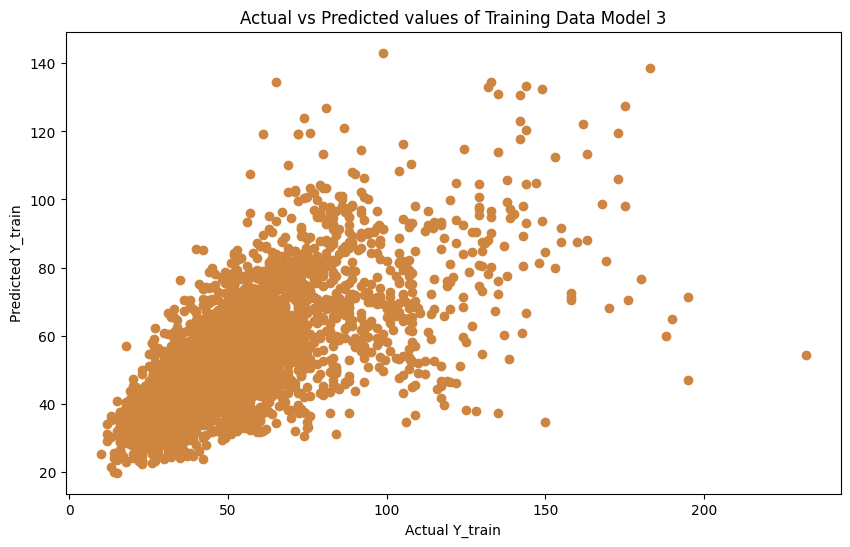

In [28]:
# Plotting Training Actual values vs Predicted Values
plt.figure(figsize=(10, 6))
# Scatter plot of training data (actual values)
plt.scatter(y_train, y_pred_train, color='peru')
# Labels
plt.xlabel('Actual Y_train')
plt.ylabel('Predicted Y_train')
plt.title('Actual vs Predicted values of Training Data Model 3')
# Display the plot
plt.show()


In [ ]:
#Prdicitng y testing values
y_pred_test = lr.predict(x_test)
y_pred_test

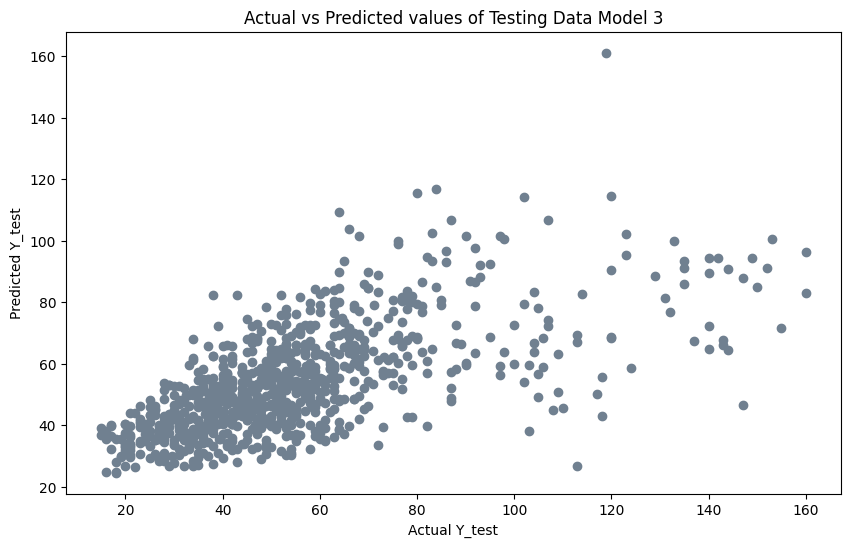

In [29]:
#Plotting  Testing Actual values vs Predicted Vlaues
plt.figure(figsize=(10, 6))
# Scatter plot of testing data
plt.scatter(y_test, y_pred_test, color ='slategrey')
# Labels
plt.xlabel('Actual Y_test')
plt.ylabel('Predicted Y_test')
plt.title('Actual vs Predicted values of Testing Data Model 3')
# Display the plot
plt.show()


In [16]:
#Calculating training data error term for linear regression
res_train = (y_train - y_pred_train)
res_train

4339    81.980863
4275    38.238063
3849    39.494090
883     -3.032717
134     -5.120574
          ...    
1033    -5.910028
3264   -16.802927
1653   -26.773784
2607   -14.596526
2732     4.651529
Name: AQI, Length: 3533, dtype: float64

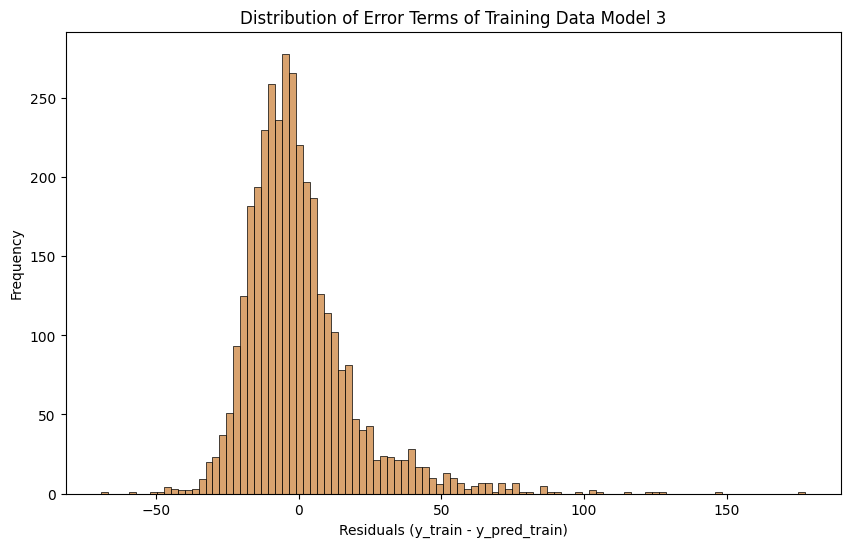

In [17]:
# Plotting histogram to show the error terms for trainig data
plt.figure(figsize=(10, 6))
# Creating the histogram plot using Seaborn
sns.histplot(res_train , color = 'peru')

# Label the plot
plt.title('Distribution of Error Terms of Training Data Model 3')
plt.xlabel('Residuals (y_train - y_pred_train)')
plt.ylabel('Frequency')
plt.show()

In [18]:
#Calculating testing data error term for linear regression
res_test = (y_test - y_pred_test)
res_test

2917   -24.462691
1457    -8.315770
1669    37.352202
2013   -24.759252
4303    21.807993
          ...    
2527     6.427214
2339   -12.380431
3276    -8.976370
3354    -3.740195
3019   -33.515620
Name: AQI, Length: 884, dtype: float64

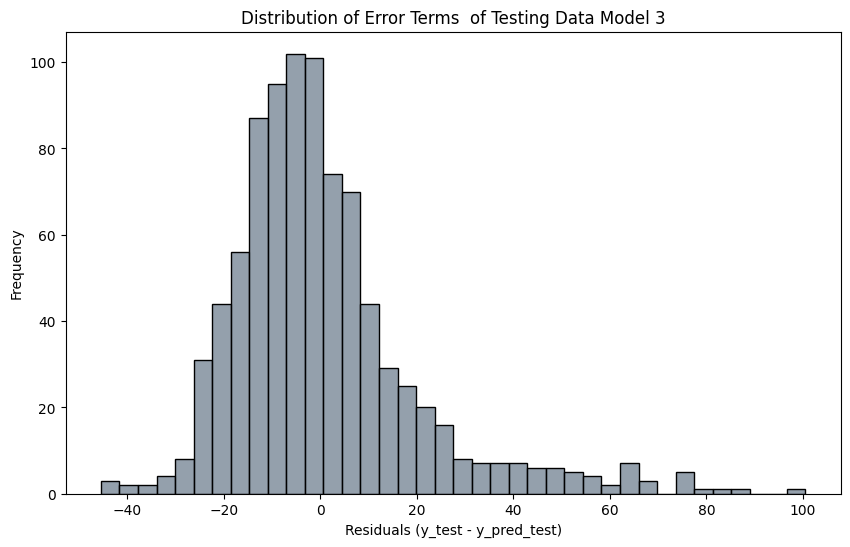

In [19]:
# Plotting histogram to show the error terms for testing data
plt.figure(figsize=(10, 6))
# Creating the histogram plot using Seaborn
sns.histplot(res_test , color ='slategrey')
# Label the plot
plt.title('Distribution of Error Terms  of Testing Data Model 3')
plt.xlabel('Residuals (y_test - y_pred_test)')
plt.ylabel('Frequency')
plt.show()

Evaluation of Linear Regression

#Training Data

In [20]:
#Calculating Mean Squared Error of Training Data
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE) of Training Data:", mse)

Mean Squared Error (MSE) of Training Data: 367.51989118675203


In [21]:
#calculating Root Mean Squared Error of Training Data
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of Training Data:", rmse)

Root Mean Squared Error (RMSE) of Training Data: 19.170808308121806


In [22]:
#Calculating Mean Absolute Error of Training Data
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (MAE) of Training Data:", mae)

Mean Absolute Error (MAE) of Training Data: 13.355867871455413


In [23]:
#Calculating R-Squared of Training Data
rsquare =  r2_score(y_train, y_pred_train)
print("R-sqaured of Training Data:", rsquare)

R-sqaured of Training Data: 0.45296390059534253


###Testing Data

In [24]:
#Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE) of Testing Data :", mse)

Mean Squared Error (MSE) of Testing Data : 381.1122419287955


In [25]:
#calculating Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of Testing Data:", rmse)

Root Mean Squared Error (RMSE) of Testing Data: 19.52209624832322


In [26]:
#Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE) of Testing Data:", mae)

Mean Absolute Error (MAE) of Testing Data: 13.714497260079185


In [27]:
#Calculating R-Squared  of Testing Data
rsquare =  r2_score(y_test, y_pred_test)
print("R-sqaured of Testing Data:", rsquare)

R-sqaured of Testing Data: 0.4225384801863755
